Sai Subhash Kotaru

sk12154

N16158744

In [ ]:
import torch

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Simulation of Multivariate Normal Distribution

In [ ]:
from torch.distributions.multivariate_normal import MultivariateNormal
def samples_generator(mean,cov,count):
  distrib = MultivariateNormal(mean, covariance_matrix=cov)
  return distrib.rsample(sample_shape=(count,))

In [ ]:
        #A distribution
a_mean = torch.Tensor([-0.5,-0.5])
a_cov = torch.Tensor([[1, 0.25],[0.25,1]])
a_tensor = samples_generator(a_mean,a_cov,1000)

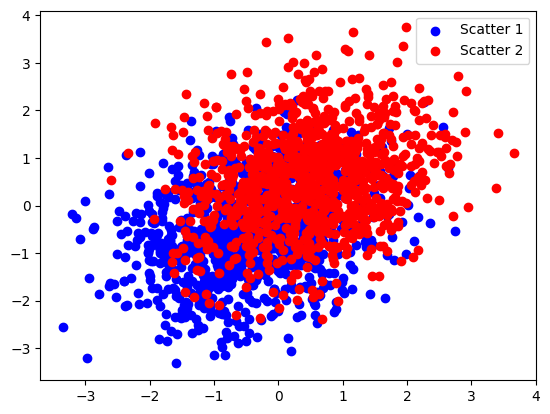

In [ ]:
        #B distribution
b_mean = torch.Tensor([0.5,0.5])
b_cov = torch.Tensor([[1, 0.25],[0.25,1]])
b_tensor = samples_generator(b_mean,b_cov,1000)
        #Plotting
plt.scatter(x=a_tensor[:,0], y= a_tensor[:,1], color='blue', label='Scatter 1')
plt.scatter(x=b_tensor[:,0], y= b_tensor[:,1], color='red', label='Scatter 2')
plt.legend()
plt.show()

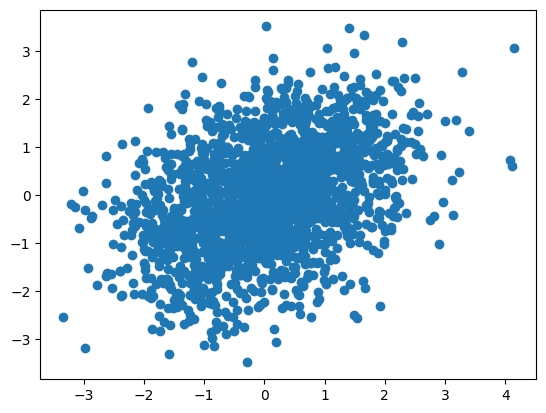

In [ ]:
dataset = torch.cat((a_tensor,b_tensor),dim=0)
plt.scatter(x=dataset[:,0], y= dataset[:,1])
plt.show()

In [ ]:
#Normalization
data_min = torch.min(dataset,dim=0).values
data_max = torch.max(dataset,dim=0).values
dataset = 1 + ((dataset - data_min)/(data_max-data_min))*9

tensor([[6.2176, 3.4184],
        [4.8174, 5.2870],
        [2.3907, 4.5612],
        ...,
        [7.9496, 6.9023],
        [5.2822, 6.2168],
        [5.0278, 4.9703]])


In [ ]:
from sklearn.decomposition import PCA
from IPython.display import clear_output
def scale_back(X,data_max,data_min):
  X = (X-1)/ 9
  X = (X * (data_max - data_min)) + data_min
  return X
def plot_clusters(data, labels, centroids, iteration):
  pca = PCA(n_components=2)
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.transform(centroids)
  clear_output(wait = True)
  data = scale_back(data, data_max.numpy(), data_min.numpy())
  centroids = scale_back(centroids, data_max.numpy(), data_min.numpy())
  plt.title(f'Iteration {iteration}')
  plt.scatter(x=data[:,0], y= data[:,1], c=labels)
  plt.scatter(x = centroids[:,0], y=centroids[:,1])
  plt.show()

In [ ]:
#Initialising centroids, computing euclidean distances
n_samples, n_features = dataset.shape
idx = torch.randint(0,n_samples,(2,))
centroids = dataset[idx]

dist = torch.cdist(dataset, centroids)
labels = torch.argmin(dist,dim=1)
labels.shape

def geometric_mean(X):
  return torch.exp(torch.log(X).mean(dim=0))



In [ ]:
def Kmeans(X,n_clusters,max_iterations):
  n_samples, n_features = X.shape
  idx = torch.randint(0,n_samples,(n_clusters,))
  centroids = X[idx]
  updated_centroids = torch.ones_like(centroids)
  j=1
  while j<max_iterations and not torch.equal(centroids, updated_centroids):
    updated_centroids = centroids
    dist = torch.cdist(X, centroids)
    labels = torch.argmin(dist,dim=1)
    centroids = torch.stack([geometric_mean(X[labels==i]) if (labels == i).sum() > 0 else centroids[i] for i in range(n_clusters)])
    plot_clusters(X.numpy(), labels.numpy(), centroids.numpy(), j)
    j+=1


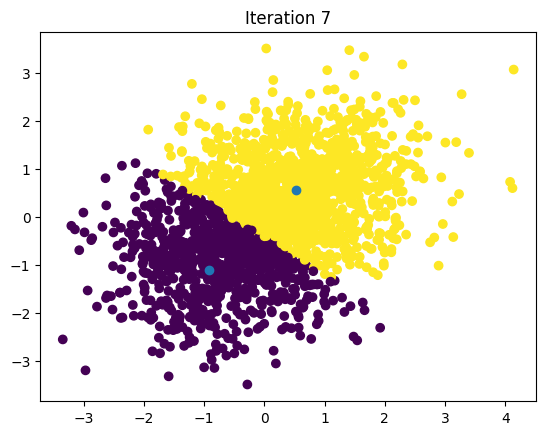

In [ ]:
Kmeans(dataset,2,50)

PCA


In [ ]:
# Builtin PCA
pca = PCA(n_components=2)
pca.fit(dataset.numpy())

PCA(n_components=2)

In [ ]:
pca.components_

array([[ 0.6454081,  0.763838 ],
       [ 0.763838 , -0.6454081]], dtype=float32)

In [ ]:
dataset_mean = torch.mean(dataset, dim=0)
dataset_centered = dataset - dataset_mean

    # Covariance matrix
cov_matrix = torch.mm(dataset_centered.T, dataset_centered) / (dataset_centered.shape[0])

    # Eigen decomposition
eigenvalues, eigenvectors = torch.linalg.eig(cov_matrix)

eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real

    # Sort eigenvalues and corresponding eigenvectors in descending order
order_idx = torch.argsort(eigenvalues, descending=True)
eigenvalues = eigenvalues[order_idx]
eigenvectors = eigenvectors[:, order_idx]

    # Select the top 2 eigenvectors
components = eigenvectors[:, :2]

In [ ]:
components

tensor([[-0.6454, -0.7638],
        [-0.7638,  0.6454]])

In [ ]:
pca.components_

array([[ 0.6454081,  0.763838 ],
       [ 0.763838 , -0.6454081]], dtype=float32)

    If v is an eigen vector -v is also eigenvector. So we have obtained same eigenvectors using in built and also by implementing